# Introdução

O dataset Telco Customer Churn contêm informações sobre uma empresa fictícia de telecomunicações que forneceu serviços de telefone residencial e Internet para 7043 clientes na Califórnia no terceiro trimestre. Eles indicam quais clientes deixaram, permaneceram ou se inscreveram para os seus serviços.

## Dataset 

|Feature|Descrição|
|---|---|
|`customerID`|Identificador único dos clientes|
|`gender`|Gênero|
|`SeniorCitizen`|É idoso?|
|`Partner`|Possui parceiro?|
|`Dependents`|Possui dependentes?|
|`tenure`|Tempo de relacionamento (em meses)|
|`PhoneService`|Possui serviço telefonico?|
|`MultipleLines`|Possui multiplas linhas?(Sim, não, não possui serviço telefonico)|
|`InternetService`|Provedor de serviços de internet (DSL, Fibra ou não)|
|`OnlineSecurity`|Possui seguro online?|
|`OnlineBackup`|Possui backup online?|
|`DeviceProtection`|Possui proteção do dispositivo?|
|`TechSupport`|Tem suporte técnico?|
|`StreamingTV`|Possui streaming de TV?|
|`StreamingMovies`|Possui streaming de Filmes?|
|`Contract`|Tipo de contrato(mês-a-mês, anual ou bi-anual)|
|`PaperlessBilling`|Recebe boletos?|
|`PaymentMethod`|Método de pagamento|
|`MonthlyCharges`|Taxa de serviço|
|`TotalCharges`|Total pago pelo cliente|
|`Churn`|Alvo|

# Bibliotecas e dados
## Importações 

In [181]:
# Manipulação de dados
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Notebook config
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fast')
palette = ['#0a369d', '#4472ca', '#5e7ce2', '#92b4f4', '#cfdee7']
sns.set_palette(palette)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

<Figure size 1000x200 with 0 Axes>

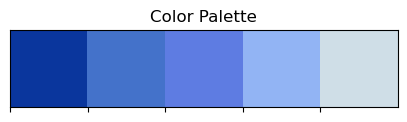

In [161]:
plt.figure(figsize=(10, 2))
sns.palplot(sns.color_palette(palette))
plt.title("Color Palette")
plt.show()

In [162]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Qualidade dos dados

In [163]:
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset possui 7043 linhas e 21 colunas.


In [164]:
print(f"O dataset possui: {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")
print(f"O dataset possui: {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")

O dataset possui: 18 colunas categóricas.
O dataset possui: 3 colunas numéricas.


In [165]:
df.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

In [166]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Limpeza e manipulação

As alterações necessárias para prosseguir a análise serão a alteração dos valores da coluna `SeniorCitizen` para Yes e No, remover a coluna `customerID` e ajustar o tipo da coluna `TotalCharges`. 

In [168]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [169]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [170]:
df = df.drop(columns = ['customerID'], axis = 1)

In [171]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Análise Exploratória dos Dados 
## Estatísticas descritivas

In [172]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,401.45,1397.48,3794.74,8684.80


- Em média os clientes da Telco tem pouco mais de 2 anos de relacionamento com a empresa (32 meses), o desvio padrão indica uma alta variância
- O preço das mensalidades é em média de 64,76 USD, chegando até 118,75 USD

Vamos buscar outliers através de boxplots.

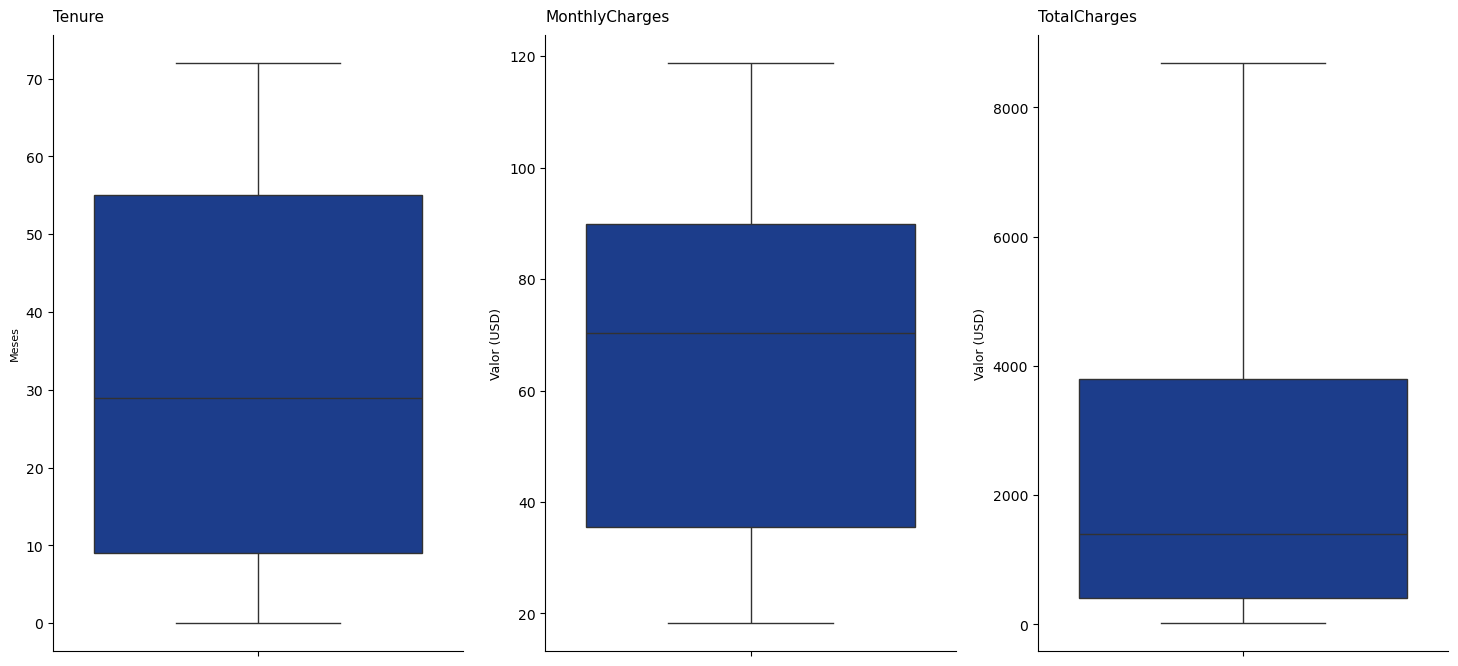

In [173]:
fig, axes = plt.subplots(1, 3, figsize = (18, 8))

sns.boxplot(ax = axes[0], y = df['tenure'])
axes[0].set_title('Tenure', loc = 'left', fontsize = 11, pad = 10)
axes[0].set_ylabel('Meses', fontsize = 8)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

sns.boxplot(ax = axes[1], y = df['MonthlyCharges'])
axes[1].set_title('MonthlyCharges', loc = 'left', fontsize = 11, pad = 10)
axes[1].set_ylabel('Valor (USD)', fontsize = 9)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

sns.boxplot(ax = axes[2], y = df['TotalCharges'])
axes[2].set_title('TotalCharges', loc = 'left', fontsize = 11, pad = 10)
axes[2].set_ylabel('Valor (USD)', fontsize = 9)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

Não foram encontrados outliers, então vamos prosseguir para as variáveis categóricas. 

In [174]:
df.select_dtypes(exclude = 'number').describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [175]:
df['Churn'].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

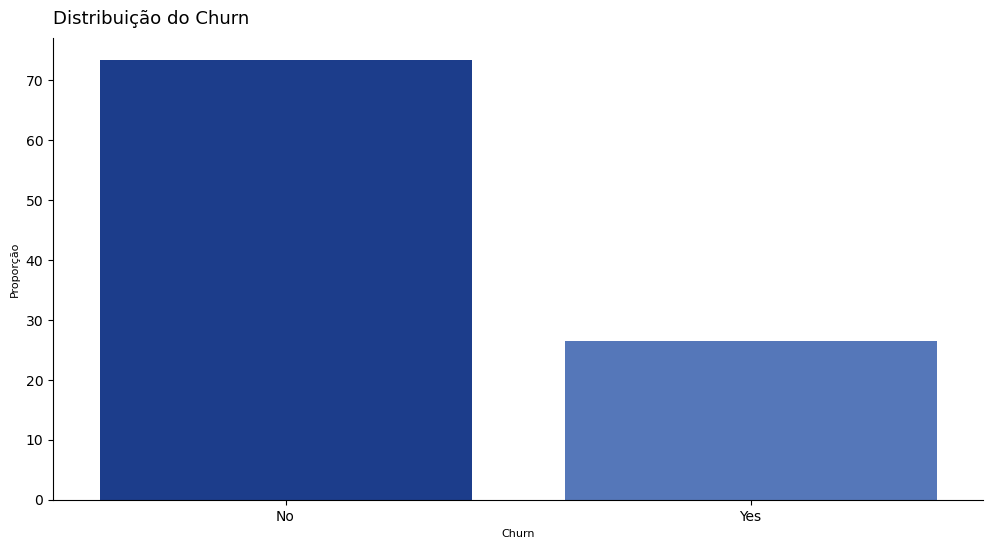

In [176]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(df, x = 'Churn', hue = 'Churn', stat = 'percent')
ax.set_title('Distribuição do Churn', fontsize = 13, pad = 10, loc = 'left')
ax.set_xlabel('Churn', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

- A taxa de churn é de 26.53% na Telco Telecom totalizando uma retenção de 73.46%, o setor de telecomunicações tem uma taxa de retenção de cerca de 69% [*](https://customergauge.com/blog/average-churn-rate-by-industry).
- O tipo de contrato mais comum é o de renovação mensal.
- A forma de pagamento mais frequente é sem papeis, com o eletronic check. 

## Análises bivariadas

### Churn x Serviço de Internet

In [215]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

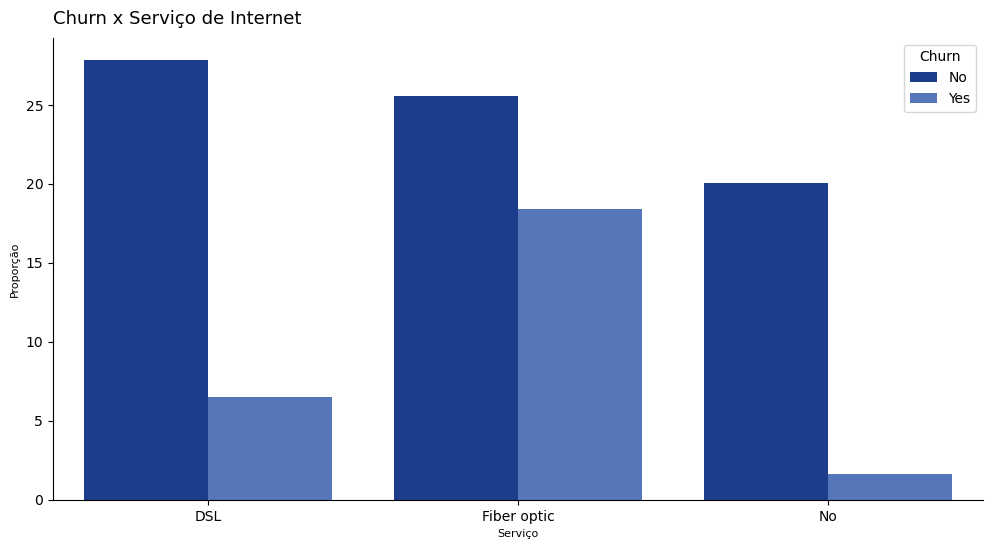

In [224]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(df, x = 'InternetService', hue = 'Churn', stat = 'percent')
ax.set_title("Churn x Serviço de Internet", fontsize = 13, pad = 10, loc = 'left')
ax.set_xlabel('Serviço', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Churn x Tipo de Contrato

In [228]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

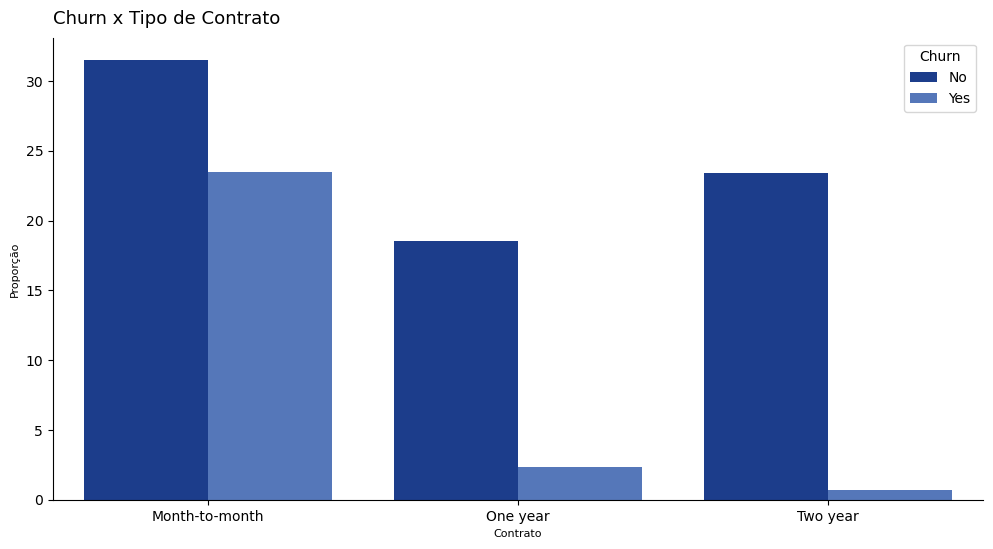

In [225]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(df, x = 'Contract', hue = 'Churn', stat = 'percent')
ax.set_title("Churn x Tipo de Contrato", fontsize = 13, pad = 10, loc = 'left')
ax.set_xlabel('Contrato', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Churn x Método de Pagamento

In [229]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

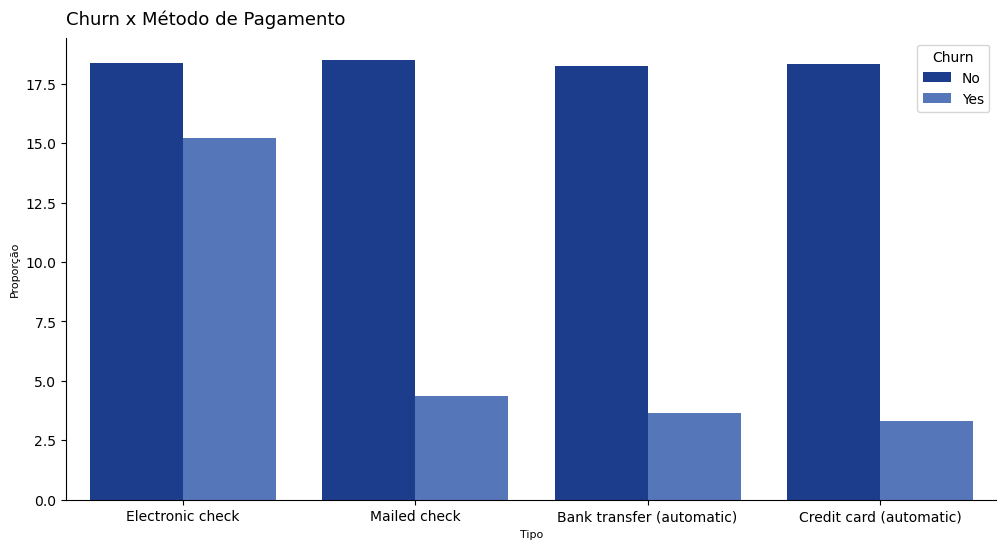

In [230]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(df, x = 'PaymentMethod', hue = 'Churn', stat = 'percent')
ax.set_title("Churn x Método de Pagamento", fontsize = 13, pad = 10, loc = 'left')
ax.set_xlabel('Tipo', fontsize = 8)
ax.set_ylabel('Proporção', fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Testando algumas hipóteses

### Tempo de relacionamento

Quanto mais tempo permanecemos consumindo um serviços, muitas vezes por apego ou comodidade evitamos seu cancelamento. Em inicio de contrato o comportamento de estar atento e menos paciente com erros é comum, vamos trabalhar em cima da seguinte hipótese:

- $H_0:$ O tempo de relacionamento com a empresa não tem efeito significativo na probabilidade de churn.
- $H_1:$ Pessoas com menor tempo de relacionamento com a empresa têm maior probabilidade de churn.

In [182]:
group_a = df[df['Churn'] == 'Yes']['tenure']
group_b = df[df['Churn'] == 'No']['tenure']

_, p_value = mannwhitneyu(group_a, group_b, alternative = 'less')

alpha = 0.05

if p_value < alpha:
    print("Rejeitamos H0: Clientes com menor tempo de relacionamento com a empresa tem maior probabilidade de churn.")
else:
    print("Não rejeitamos H0: O tempo de relacionamento com a empresa não tem efeito significante na probabilidade de churn.")

Rejeitamos H0: Clientes com menor tempo de relacionamento com a empresa tem maior probabilidade de churn.


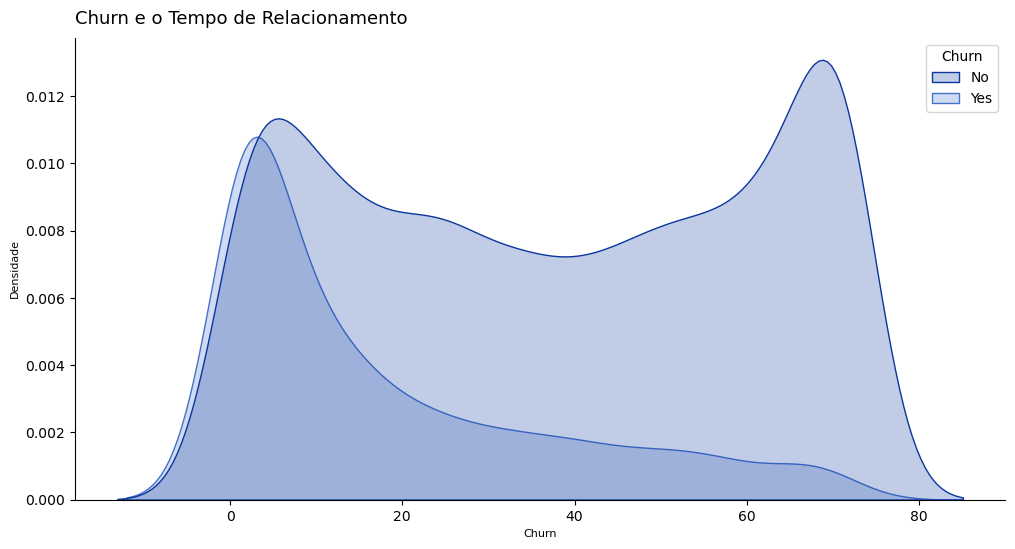

In [190]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.kdeplot(x = df['tenure'], hue = df['Churn'], fill = True)
ax.set_title("Churn e o Tempo de Relacionamento", fontsize = 13, pad = 10, loc = 'left')
ax.set_xlabel('Churn', fontsize = 8)
ax.set_ylabel('Densidade', fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Mensalidade

Clientes que optam por serviços mais caros, na maioria dos casos, são mais atentos e exigentes em relação sua qualidade. Vamos testar a seguinte hipótese:

- $H_0:$ O valor da mensalidade não tem efeito significativo na probabilidade de churn.
- $H_1:$ Clientes que pagam maiores mensalidades têm maior probabilidade de churn.

In [191]:
group_a = df[df['Churn'] == 'Yes']['MonthlyCharges']
group_b = df[df['Churn'] == 'No']['MonthlyCharges']

_, p_value = mannwhitneyu(group_a, group_b, alternative = 'greater')

alpha = 0.05

if p_value < alpha:
    print("Rejeitamos H0: Clientes que pagam maiores mensalidades têm maior probabilidade de churn.")
else:
    print("Não rejeitamos H0: O valor da mensalidade não tem efeito significativo na probabilidade de churn.")

Rejeitamos H0: Clientes que pagam maiores mensalidades têm maior probabilidade de churn.


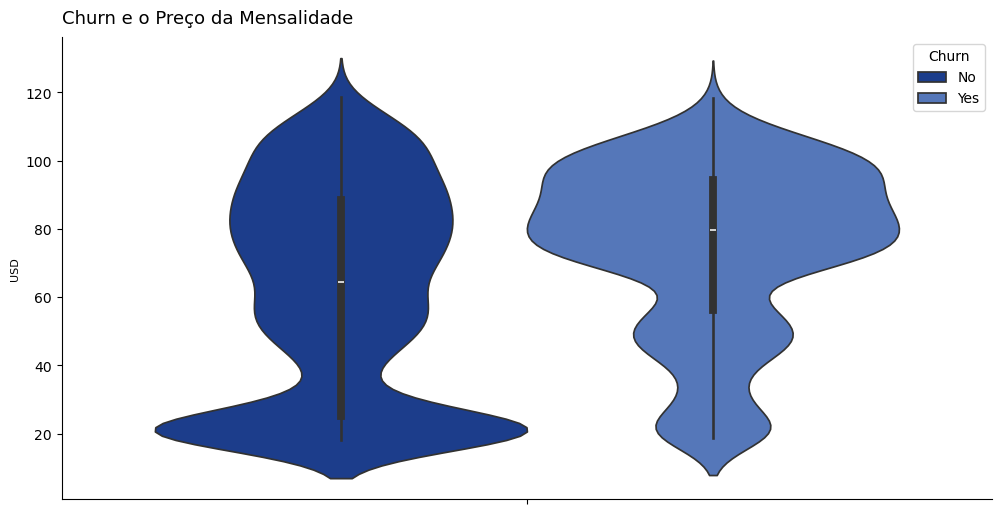

In [203]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.violinplot(y = df['MonthlyCharges'], hue = df['Churn'])
ax.set_title("Churn e o Preço da Mensalidade", fontsize = 13, pad = 10, loc = 'left')
ax.set_ylabel('USD', fontsize = 8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Conclusões

- Clientes com menor tempo de relacionamento tem maior probabilidade de churn.
- Aqueles que pagam maiores mensalidades também sãos os com maior probabilidade de churn.
- Planos de renovação mensal são os com maior probabilidade de churn.
- Pagamentos automáticos são os com menor probabilidade de churn.

### Recomendações
- Criar ações para fidelização de clientes, como descontos e ofertas especiais.
- Melhorar o atendimento e oferecer vantagens exclusivas para clientes dos planos mais caros.
- Incentivar a efetivação de planos de renovação anual e com pagamentos automáticos.

É possível criar um plano de ação em forma de campanhas de marketing e novos planos de serviço para diminuir a taxa de Churn na Telco, algumas opções seriam (1) oferecer um plano anual com desconto caso o meio de pagamento escolhido seja Bank transnfer ou Credit card, (2) revisar preço e dar descontos para clientes com mais tempo de relacionamento que possuem planos mais caros para renovação anual. 